In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

In [3]:
df_test = pd.read_csv('data/test.csv')
df_test.head(30)
df_test.tail()

date_time  deg_C  relative_humidity  absolute_humidity  \
2242  2011-04-04 10:00:00   23.2               28.7             0.7568   
2243  2011-04-04 11:00:00   24.5               22.5             0.7119   
2244  2011-04-04 12:00:00   26.6               19.0             0.6406   
2245  2011-04-04 13:00:00   29.1               12.7             0.5139   
2246  2011-04-04 14:00:00   27.9               13.5             0.5028   

      sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  
2242    1340.3    1023.9     522.8    1374.0    1659.8  
2243    1232.8     955.1     616.1    1226.1    1269.0  
2244    1187.7    1052.4     572.8    1253.4    1081.1  
2245    1053.2    1009.0     702.0    1009.8     808.5  
2246    1124.6    1078.4     608.2    1061.3     816.0

In [4]:
df.isnull().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [5]:
df.dtypes

date_time                  object
deg_C                     float64
relative_humidity         float64
absolute_humidity         float64
sensor_1                  float64
sensor_2                  float64
sensor_3                  float64
sensor_4                  float64
sensor_5                  float64
target_carbon_monoxide    float64
target_benzene            float64
target_nitrogen_oxides    float64
dtype: object

In [6]:
df.shape

(7111, 12)

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
df['date_time'].nunique()

7111

In [9]:
df.set_index('date_time', inplace=True)

In [10]:
df.sort_index(inplace=True)

In [11]:
#filter those from march 10 2010
df.loc['2010-03-10']

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   
2010-03-10 23:00:00   11.2               56.8             0.7848    1220.9   

                     sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                     
2010-03-10 18:00:00    1087.8    1056.0    1742.8    1293.4   
2010-03-10 19:00:00     888.2    1197.5    1449.9    1010.9   
2010-03-10 20:00:00     929.6    1060.2    1586.1    1117.0   
2010-03-10 21:00:00     929.0    1102.9    1536.5    1263.2   
2010-03-10 22:00:00     852.7    1180.9    1415.5    1132.2   
2010-03-10 23:00:00     697.5    1417.2    1462.6     949.0   

                     target_carbon_monoxide  target_benzene  \
date_time                                                     
2010-03-10 18:00:00                     2.5            12.0   
2010-03-10 19:00:00                     2.1             9.9   
2010-03-10 20:00:00                     2.2             9.2   
2010-03-10 21:00:00                     2.2             9.7   
2010-03-10 22:00:00                     1.5             6.4   
2010-03-10 23:00:00                     1.2             4.4   

                     target_nitrogen_oxides  
date_time                                    
2010-03-10 18:00:00                   167.7  
2010-03-10 19:00:00                    98.9  
2010-03-10 20:00:00                   127.1  
2010-03-10 21:00:00                   177.2  
2010-03-10 22:00:00                   121.8  
2010-03-10 23:00:00                    88.1

In [12]:
#filter those from march 10 2010
df.loc['2010-03-11']

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-11 00:00:00   10.7               55.7             0.7603    1244.2   
2010-03-11 01:00:00   10.3               57.0             0.7702    1181.4   
2010-03-11 02:00:00   10.1               62.7             0.7648    1159.6   
2010-03-11 03:00:00   10.5               59.6             0.7517    1030.2   
2010-03-11 04:00:00    9.4               59.9             0.7465     960.4   
2010-03-11 05:00:00   11.4               58.4             0.7366    1119.3   
2010-03-11 06:00:00   10.3               56.4             0.7353    1009.9   
2010-03-11 07:00:00   10.0               58.4             0.7417    1201.2   
2010-03-11 08:00:00   10.7               55.1             0.7408    1373.0   
2010-03-11 09:00:00   11.0               62.4             0.7691    1378.0   
2010-03-11 10:00:00   10.9               61.9             0.7552    1196.0   
2010-03-11 11:00:00   11.1               56.7             0.7352    1155.4   
2010-03-11 12:00:00    9.4               62.1             0.7951    1174.2   
2010-03-11 13:00:00    8.2               77.9             0.8393    1311.7   
2010-03-11 14:00:00    8.5               84.3             0.8736    1357.3   
2010-03-11 15:00:00    7.7               74.2             0.8778    1310.0   
2010-03-11 16:00:00    9.5               73.3             0.8569    1227.4   
2010-03-11 17:00:00    9.5               62.9             0.8185    1424.5   
2010-03-11 18:00:00   10.4               67.4             0.8065    1501.9   
2010-03-11 19:00:00    9.5               69.3             0.8319    1776.0   
2010-03-11 20:00:00   10.1               63.7             0.8133    1607.2   
2010-03-11 21:00:00    8.6               67.8             0.7419    1378.6   
2010-03-11 22:00:00    7.8               62.8             0.6905     994.0   
2010-03-11 23:00:00    8.7               58.4             0.6657     931.3   

                     sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                     
2010-03-11 00:00:00     669.3    1491.2    1413.0     769.6   
2010-03-11 01:00:00     631.7    1511.1    1359.7     715.4   
2010-03-11 02:00:00     602.9    1610.6    1212.2     657.2   
2010-03-11 03:00:00     521.7    1790.2    1148.6     491.0   
2010-03-11 04:00:00     490.1    1781.6    1244.9     431.6   
2010-03-11 05:00:00     522.2    1898.8    1122.9     443.1   
2010-03-11 06:00:00     553.0    1755.4    1208.8     495.6   
2010-03-11 07:00:00     640.3    1475.1    1339.0     686.2   
2010-03-11 08:00:00     927.0    1181.4    1471.5    1046.9   
2010-03-11 09:00:00     969.6    1122.2    1583.0    1069.1   
2010-03-11 10:00:00     793.9    1230.2    1431.5     799.8   
2010-03-11 11:00:00     769.6    1354.6    1266.7     664.3   
2010-03-11 12:00:00     727.6    1379.1    1429.0     644.1   
2010-03-11 13:00:00     895.1    1220.1    1629.2     846.9   
2010-03-11 14:00:00    1013.3     963.3    1712.7    1099.2   
2010-03-11 15:00:00     905.0    1103.6    1630.5     917.6   
2010-03-11 16:00:00     857.3    1080.9    1622.8     976.1   
2010-03-11 17:00:00     999.6     937.4    1684.6    1037.8   
2010-03-11 18:00:00    1266.2     743.1    1937.2    1366.7   
2010-03-11 19:00:00    1398.7     723.1    2239.7    1584.7   
2010-03-11 20:00:00    1390.0     735.6    2103.4    1538.2   
2010-03-11 21:00:00    1033.0     890.0    1809.4    1220.8   
2010-03-11 22:00:00     704.1    1364.8    1319.7     812.8   
2010-03-11 23:00:00     660.4    1486.8    1239.5     585.1   

                     target_carbon_monoxide  target_benzene  \
date_time                                                     
2010-03-11 00:00:00                     1.2             3.7   
2010-03-11 01:00:00                     1.0             3.4   
2010-03-11 02:00:00                     0.9             2.2   
2010-03-11 03:00:00                   

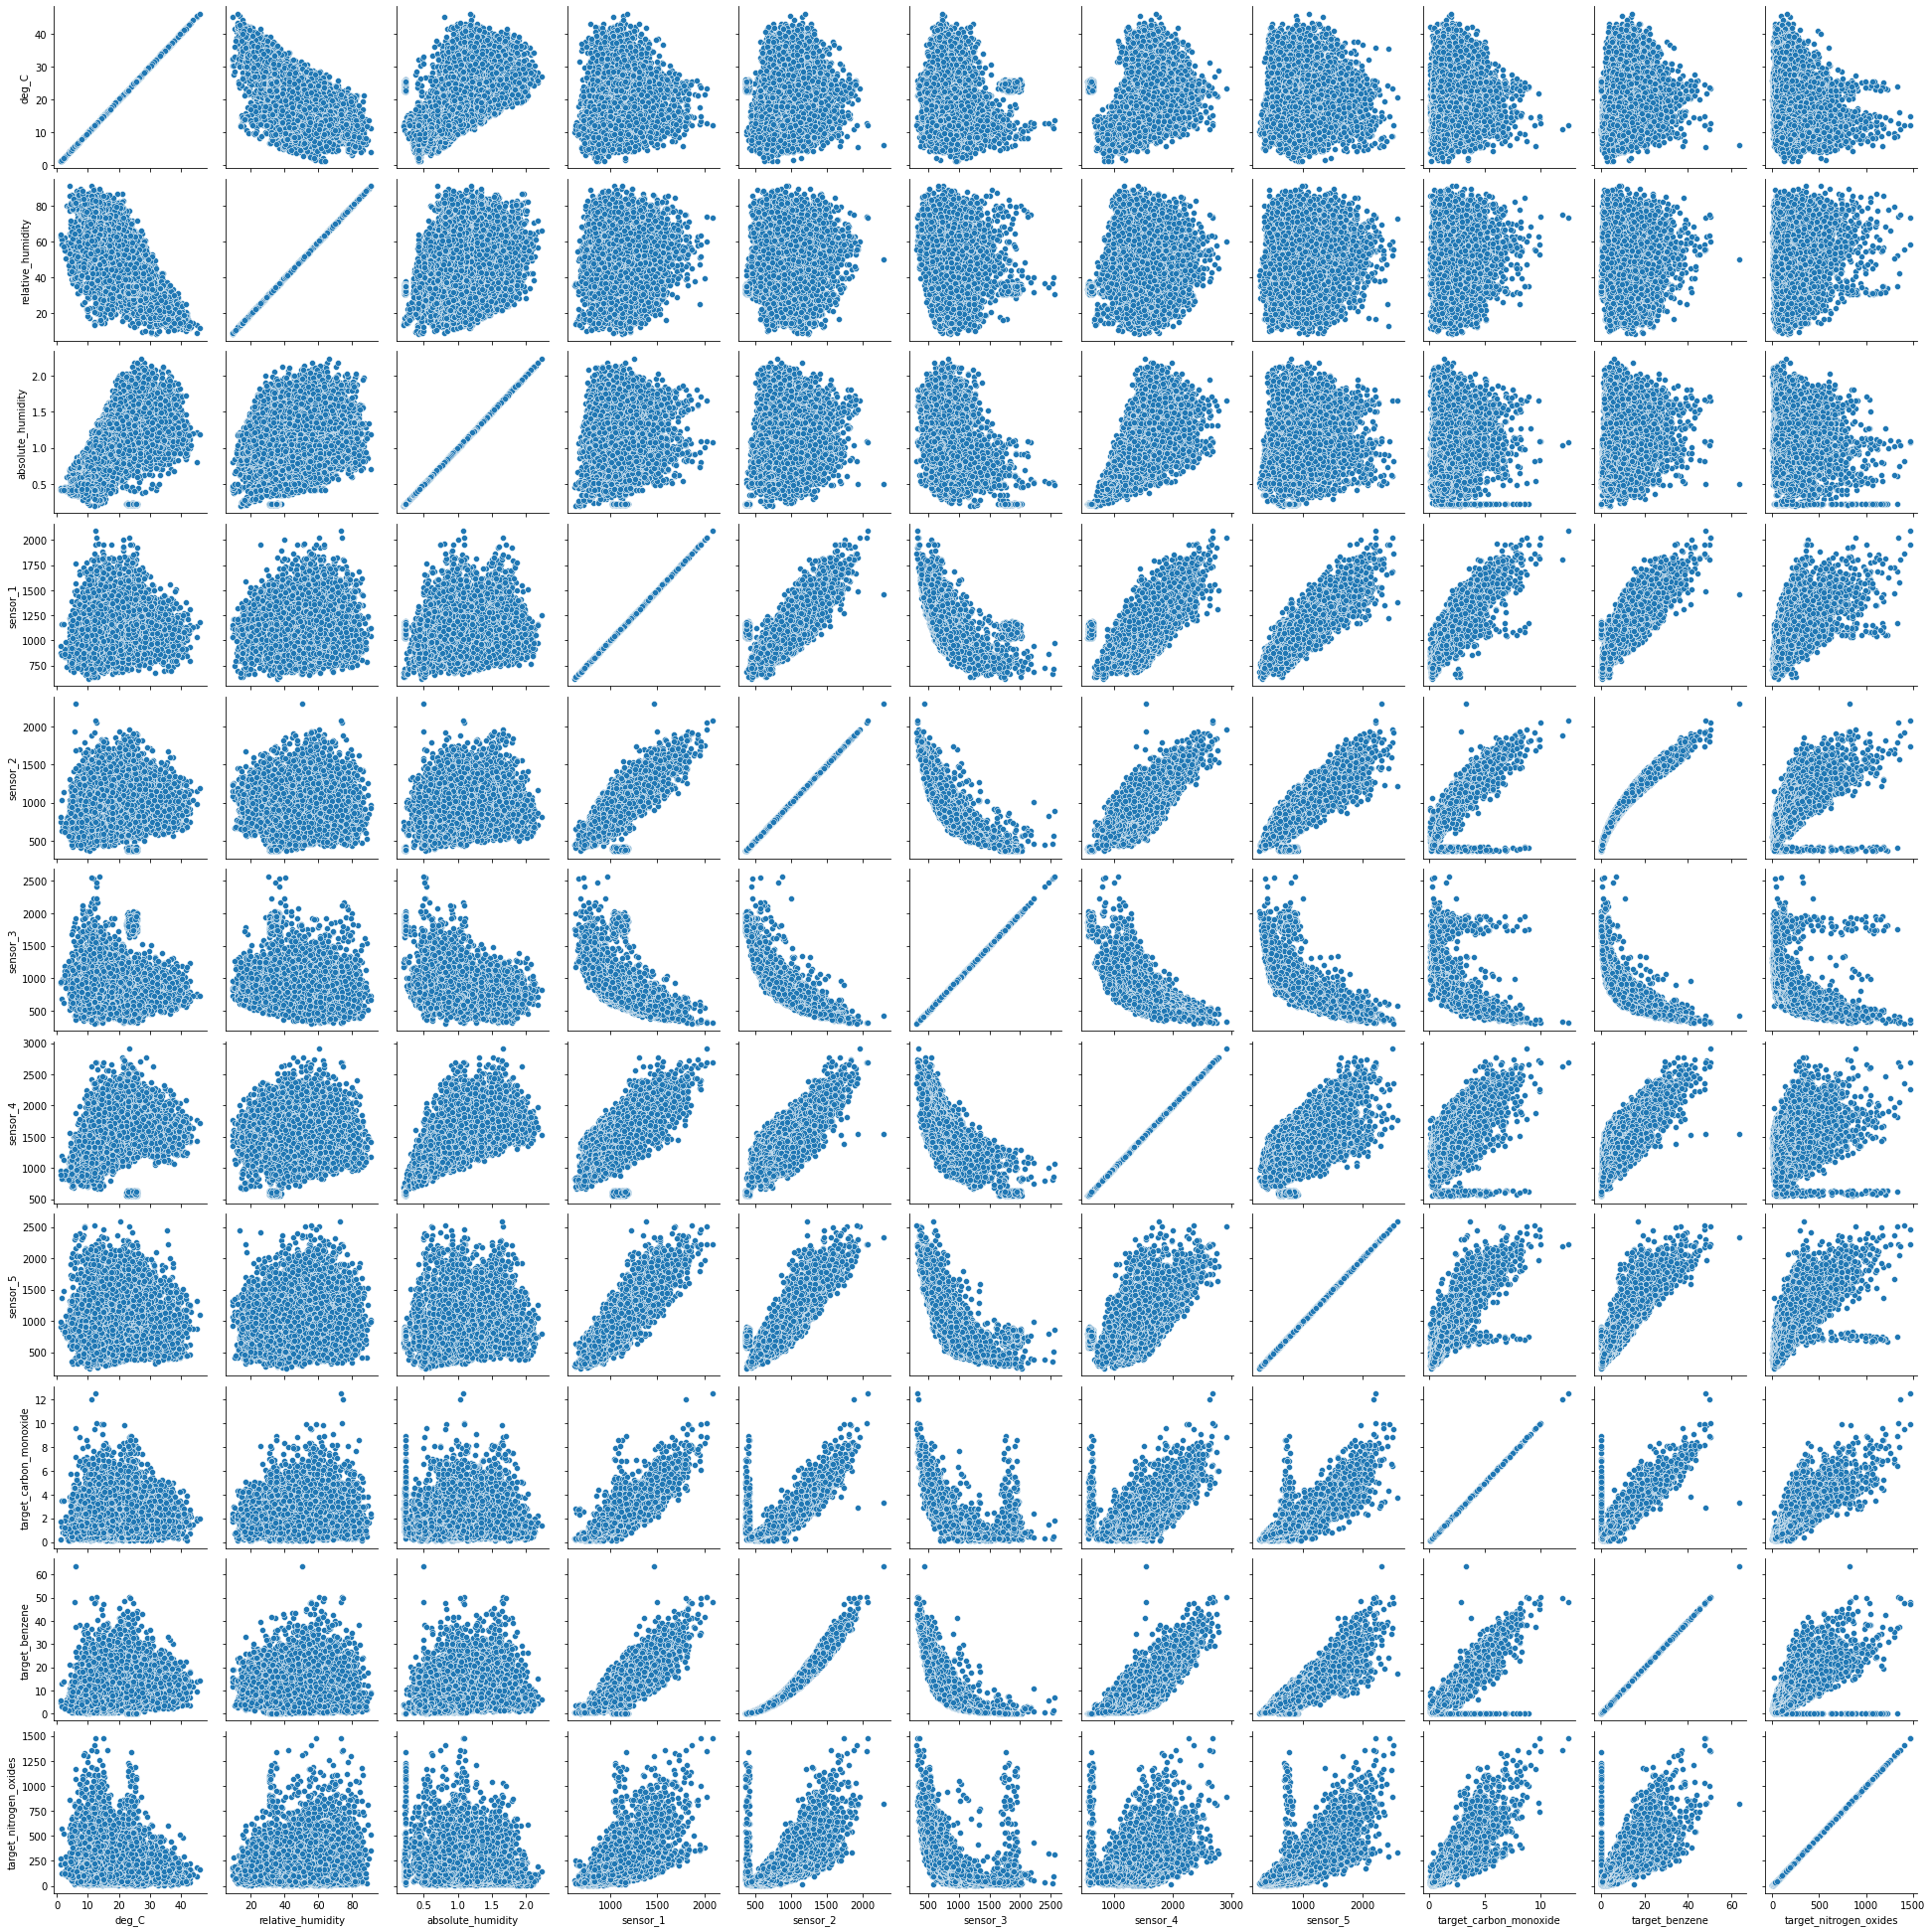

In [13]:
sns.pairplot(df, diag_kind=None)

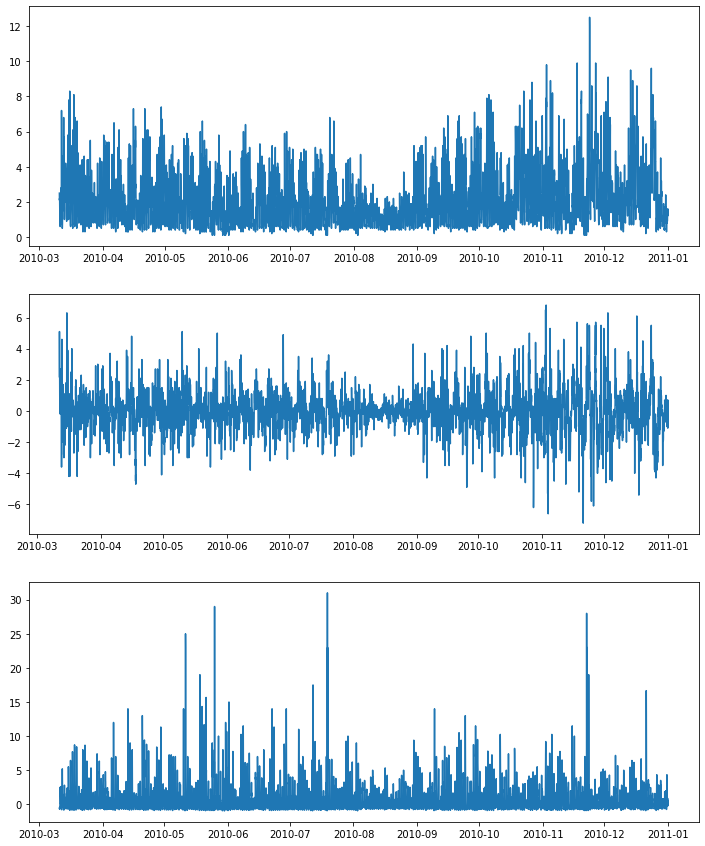

In [14]:
fig, axes = plt.subplots(nrows=3, figsize=(12,15))
axes[0].plot(df['target_carbon_monoxide'])
axes[1].plot(df['target_carbon_monoxide'].diff(24))
axes[2].plot(df['target_carbon_monoxide'].pct_change(6));

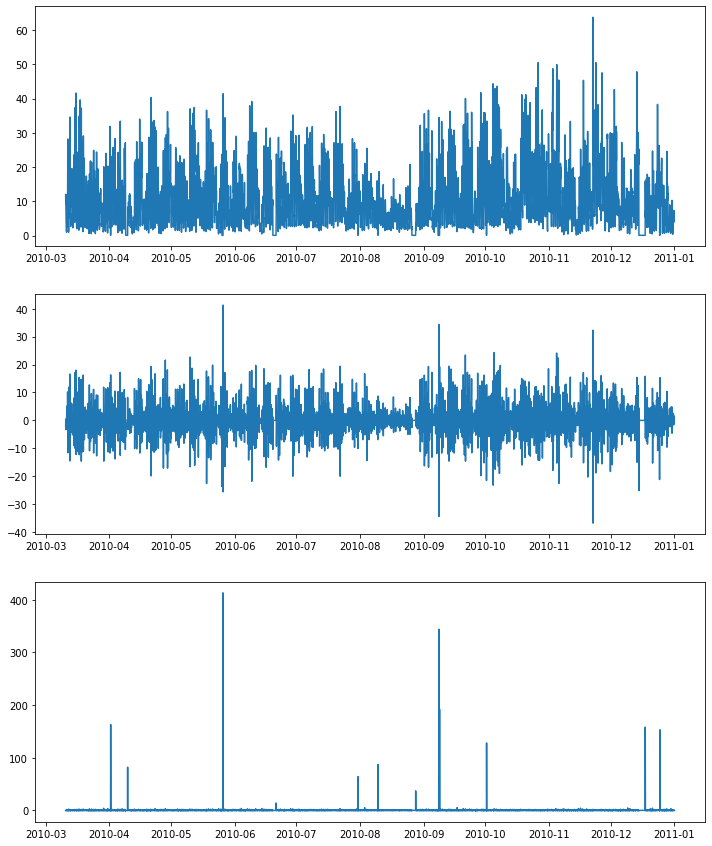

In [15]:
fig, axes = plt.subplots(nrows=3, figsize=(12,15))
axes[0].plot(df['target_benzene'])
axes[1].plot(df['target_benzene'].diff())
axes[2].plot(df['target_benzene'].pct_change());

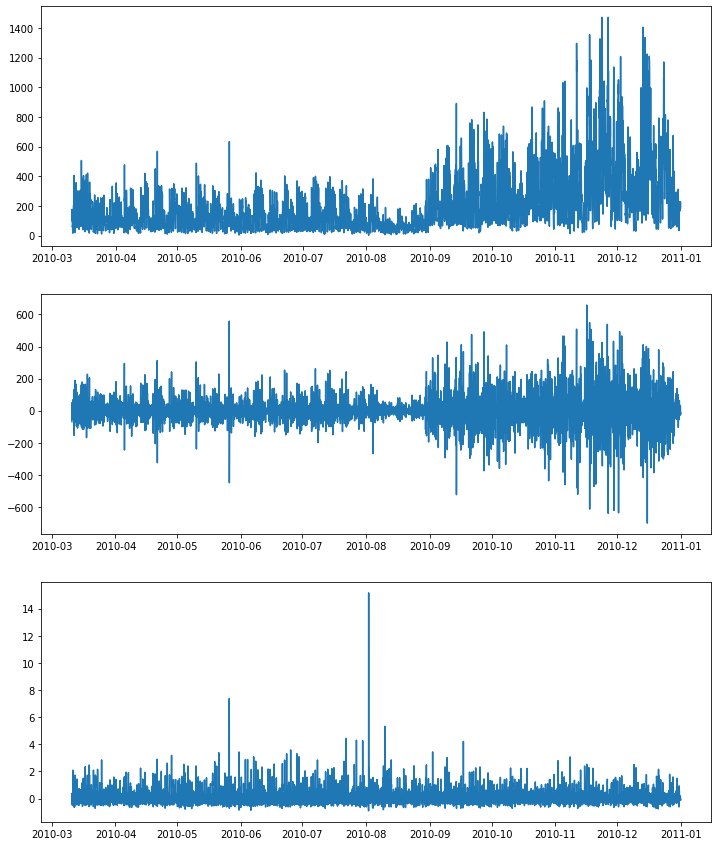

In [16]:

fig, axes = plt.subplots(nrows=3, figsize=(12,15))
axes[0].plot(df['target_nitrogen_oxides'])
axes[1].plot(df['target_nitrogen_oxides'].diff())
axes[2].plot(df['target_nitrogen_oxides'].pct_change());

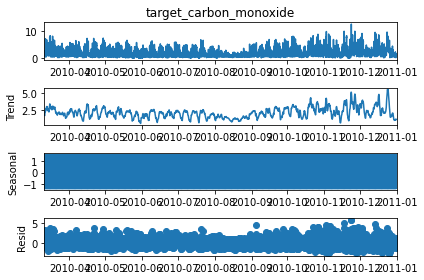

In [17]:
decomp = seasonal_decompose(df['target_carbon_monoxide'])
decomp.plot();

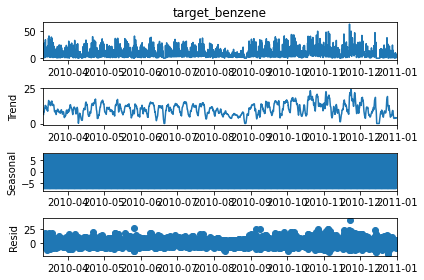

In [30]:
decomp = seasonal_decompose(df['target_benzene'])
decomp.plot();

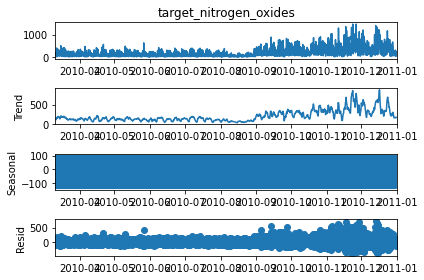

In [31]:
decomp = seasonal_decompose(df['target_nitrogen_oxides'])
decomp.plot();

In [18]:
df['target_CO_lag_1'] = df['target_carbon_monoxide'].shift(1)
df['target_CO_lag_2'] = df['target_carbon_monoxide'].shift(2)
df['target_CO_lag_3'] = df['target_carbon_monoxide'].shift(3)

In [19]:
df.corr()

deg_C  relative_humidity  absolute_humidity  \
deg_C                   1.000000          -0.668002           0.445162   
relative_humidity      -0.668002           1.000000           0.249013   
absolute_humidity       0.445162           0.249013           1.000000   
sensor_1                0.017513           0.093130           0.105977   
sensor_2                0.133167          -0.035152           0.236894   
sensor_3               -0.145437          -0.102146          -0.485445   
sensor_4                0.308202           0.027002           0.567376   
sensor_5               -0.050567           0.126466           0.124945   
target_carbon_monoxide -0.007503           0.016589          -0.013756   
target_benzene          0.109757          -0.022895           0.186293   
target_nitrogen_oxides -0.205984           0.178608          -0.101911   
target_CO_lag_1         0.000888           0.004204          -0.008553   
target_CO_lag_2         0.006523          -0.001610          -0.009886   
target_CO_lag_3         0.000193           0.012436          -0.014847   

                        sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
deg_C                   0.017513  0.133167 -0.145437  0.308202 -0.050567   
relative_humidity       0.093130 -0.035152 -0.102146  0.027002  0.126466   
absolute_humidity       0.105977  0.236894 -0.485445  0.567376  0.124945   
sensor_1                1.000000  0.811898 -0.592233  0.643191  0.860849   
sensor_2                0.811898  1.000000 -0.819334  0.812454  0.863464   
sensor_3               -0.592233 -0.819334  1.000000 -0.741439 -0.706006   
sensor_4                0.643191  0.812454 -0.741439  1.000000  0.641120   
sensor_5                0.860849  0.863464 -0.706006  0.641120  1.000000   
target_carbon_monoxide  0.857215  0.821025 -0.547567  0.571412  0.834501   
target_benzene          0.842534  0.964440 -0.735545  0.783750  0.877662   
target_nitrogen_oxides  0.643044  0.604795 -0.427622  0.235662  0.708270   
target_CO_lag_1         0.717298  0.674937 -0.470988  0.439585  0.736605   
target_CO_lag_2         0.541639  0.485750 -0.361883  0.277220  0.577325   
target_CO_lag_3         0.391965  0.330394 -0.263105  0.150917  0.424811   

                        target_carbon_monoxide  target_benzene  \
deg_C                                -0.007503        0.109757   
relative_humidity                     0.016589       -0.022895   
absolute_humidity                    -0.013756        0.186293   
sensor_1                              0.857215        0.842534   
sensor_2                              0.821025        0.964440   
sensor_3                             -0.547567       -0.735545   
sensor_4                              0.571412        0.783750   
sensor_5                              0.834501        0.877662   
target_carbon_monoxide                1.000000        0.881884   
target_benzene                        0.881884        1.000000   
target_nitrogen_oxides                0.806099        0.664235   
target_CO_lag_1                       0.835074        0.709721   
target_CO_lag_2                       0.609349        0.491980   
target_CO_lag_3                       0.426365        0.321081   

                        target_nitrogen_oxides  target_CO_lag_1  \
deg_C                                -0.205984         0.000888   
relative_humidity                     0.178608         0.004204   
absolute_humidity                    -0.101911        -0.008553   
sensor_1                              0.643044         0.717298   
sensor_2                              0.604795         0.674937   
sensor_3                             -0.427622        -0.470988   
sensor_4                              0.235662         0.439585   
sensor_5                              0.708270         0.736605   
target_carbon_monoxide                0.806099         0.835074   
target_benzene                        0.664235         0.709721   
target_nitrogen_oxides                1.000000 

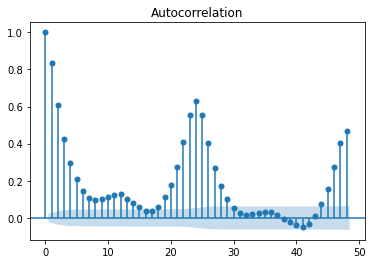

In [27]:
plot_acf(df['target_carbon_monoxide'], lags=48, alpha=0.05);

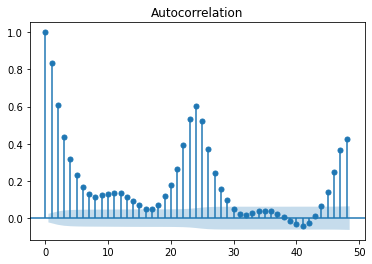

In [28]:
plot_acf(df['target_benzene'], lags=48, alpha=0.05);

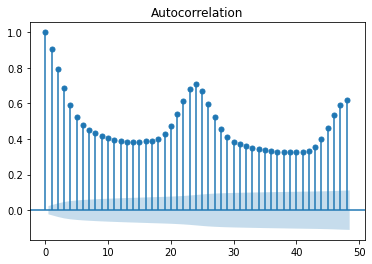

In [29]:
plot_acf(df['target_nitrogen_oxides'], lags=48, alpha=0.05);

In [32]:
df.head()

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

                     sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                     
2010-03-10 18:00:00    1087.8    1056.0    1742.8    1293.4   
2010-03-10 19:00:00     888.2    1197.5    1449.9    1010.9   
2010-03-10 20:00:00     929.6    1060.2    1586.1    1117.0   
2010-03-10 21:00:00     929.0    1102.9    1536.5    1263.2   
2010-03-10 22:00:00     852.7    1180.9    1415.5    1132.2   

                     target_carbon_monoxide  target_benzene  \
date_time                                                     
2010-03-10 18:00:00                     2.5            12.0   
2010-03-10 19:00:00                     2.1             9.9   
2010-03-10 20:00:00                     2.2             9.2   
2010-03-10 21:00:00                     2.2             9.7   
2010-03-10 22:00:00                     1.5             6.4   

                     target_nitrogen_oxides  target_CO_lag_1  target_CO_lag_2  \
date_time                                                                       
2010-03-10 18:00:00                   167.7              NaN              NaN   
2010-03-10 19:00:00                    98.9              2.5              NaN   
2010-03-10 20:00:00                   127.1              2.1              2.5   
2010-03-10 21:00:00                   177.2              2.2              2.1   
2010-03-10 22:00:00                   121.8              2.2              2.2   

                     target_CO_lag_3  
date_time                             
2010-03-10 18:00:00              NaN  
2010-03-10 19:00:00              NaN  
2010-03-10 20:00:00              NaN  
2010-03-10 21:00:00              2.5  
2010-03-10 22:00:00              2.1

In [33]:
# Create a column called `lag_CO_6` that lags carbon monoxide by 6 hours.
df['lag_CO_6'] = df['target_carbon_monoxide'].shift(6)

# Create a column called `lag_CO_12` that lags carbon monoxide by 12 hours
df['lag_CO_12'] = df['target_carbon_monoxide'].shift(12)

# Create a column called `lag_CO_24` that lags carbon monoxide by one day.
df['lag_CO_24'] = df['target_carbon_monoxide'].shift(24)

# Create a variable called `time` that takes on a value of 0 in 2010-03-10 18:00
# then increases by 1 each hour.
df['time'] = range(0, df.shape[0])

In [35]:
df.tail()

deg_C  relative_humidity  absolute_humidity  sensor_1  \
date_time                                                                    
2010-12-31 20:00:00    9.2               32.0             0.3871    1000.5   
2010-12-31 21:00:00    9.1               33.2             0.3766    1022.7   
2010-12-31 22:00:00    9.6               34.6             0.4310    1044.4   
2010-12-31 23:00:00    8.0               40.7             0.4085     952.8   
2011-01-01 00:00:00    8.0               41.3             0.4375    1108.8   

                     sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                     
2010-12-31 20:00:00     811.2     873.0     909.0     910.5   
2010-12-31 21:00:00     790.0     951.6     912.9     903.4   
2010-12-31 22:00:00     767.3     861.9     889.2    1159.1   
2010-12-31 23:00:00     691.9     908.5     917.0    1206.3   
2011-01-01 00:00:00     745.7     797.1     880.0    1273.1   

                     target_carbon_monoxide  target_benzene  \
date_time                                                     
2010-12-31 20:00:00                     1.3             5.1   
2010-12-31 21:00:00                     1.4             5.8   
2010-12-31 22:00:00                     1.6             5.2   
2010-12-31 23:00:00                     1.5             4.6   
2011-01-01 00:00:00                     1.4             4.1   

                     target_nitrogen_oxides  target_CO_lag_1  target_CO_lag_2  \
date_time                                                                       
2010-12-31 20:00:00                   191.1              1.2              1.5   
2010-12-31 21:00:00                   221.3              1.3              1.2   
2010-12-31 22:00:00                   227.4              1.4              1.3   
2010-12-31 23:00:00                   199.8              1.6              1.4   
2011-01-01 00:00:00                   186.5              1.5              1.6   

                     target_CO_lag_3  lag_CO_6  lag_CO_12  lag_CO_24  time  
date_time                                                                   
2010-12-31 20:00:00              1.4       1.5        0.7        2.4  7106  
2010-12-31 21:00:00              1.5       0.9        1.0        1.5  7107  
2010-12-31 22:00:00              1.2       1.1        1.6        0.9  7108  
2010-12-31 23:00:00              1.3       1.4        1.2        1.2  7109  
2011-01-01 00:00:00              1.4       1.5        0.8        1.7  7110

In [37]:

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

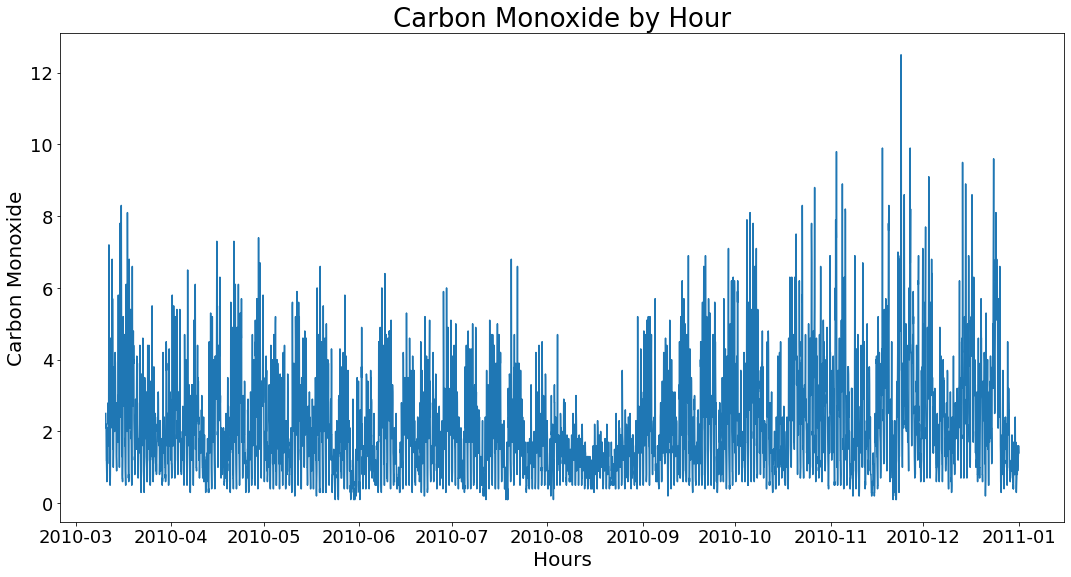

In [38]:
# Generate a time plot of the target carbon monoxide
plot_series(df, cols=['target_carbon_monoxide'], title='Carbon Monoxide by Hour', xlab='Hours', ylab='Carbon Monoxide')

In [84]:
### function for building models and plotting

def model_desired_target(target):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']),
                                                    df[target],
                                                    test_size = 0.2, shuffle=False)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    X_train.dropna(inplace=True)
    y_train = y_train[X_train.index]
    lm = sm.OLS(y_train, X_train)
    lm_results = lm.fit()
    lm_preds = lm_results.predict(X_test)
    r2 = r2_score(y_test, lm_preds)
    rmse = mean_squared_error(y_test, lm_preds) ** 0.5
    print("r2_score: ", r2, "root mean squared error: ", rmse)
    # Let's plot our predictions! 

    # Set figure size.
    plt.figure(figsize=(20,10))

    # Plot training data.
    plt.plot(y_train.index, y_train.values, color = 'blue')

    # Plot testing data.
    plt.plot(y_test.index, y_test.values, color = 'orange')

    # Plot predicted test values.
    plt.plot(lm_results.predict(X_test), color = 'green')

    # Set label.
    plt.title(label = f'Forecasting {target}', fontsize=24)

    # Resize tick marks.
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20);

r2_score:  0.8186669514639445 root mean squared error:  0.7792197177195598


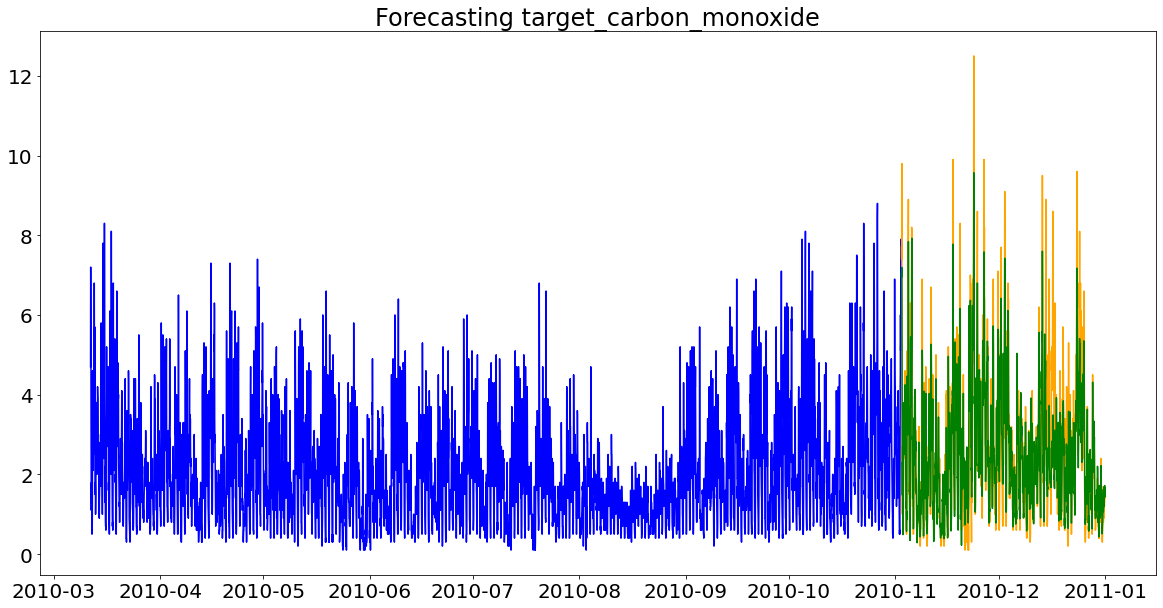

In [88]:
model_desired_target('target_carbon_monoxide');

r2_score:  0.9297984256948523 root mean squared error:  2.3589671619283226


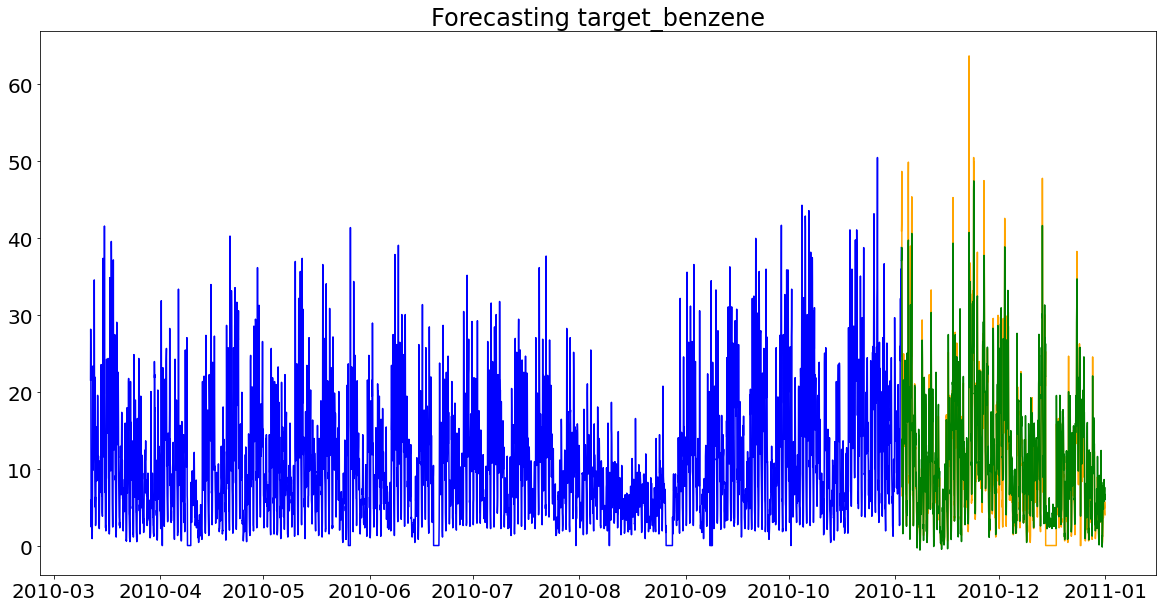

In [86]:
model_desired_target('target_benzene')

r2_score:  0.533766895107021 root mean squared error:  187.76569088539196


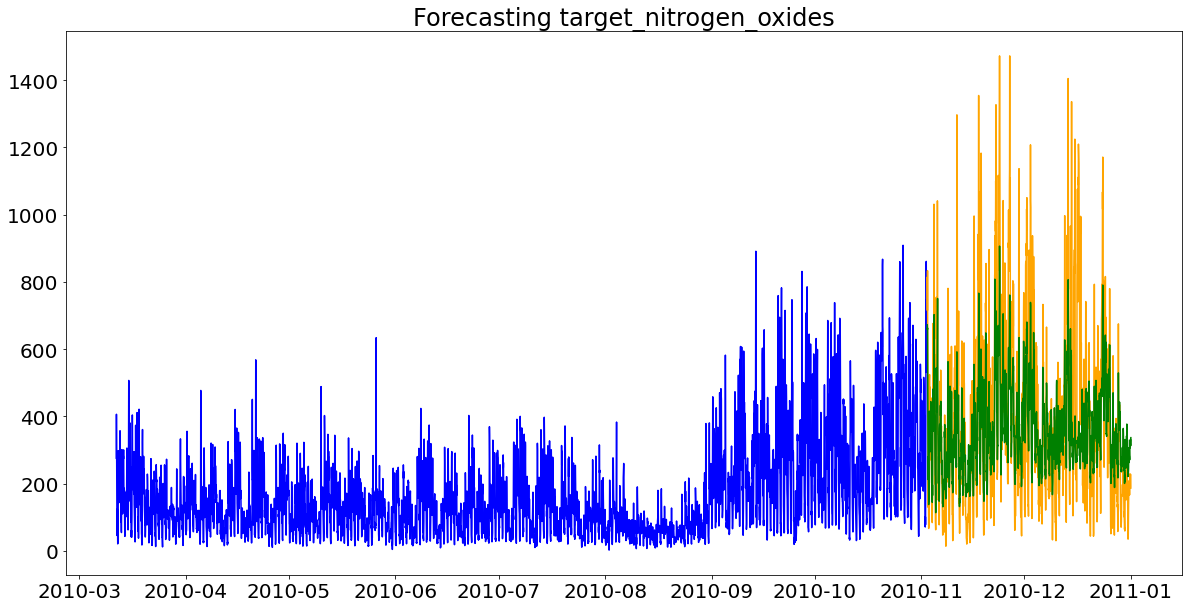

In [87]:
model_desired_target('target_nitrogen_oxides');

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']),
                                                    df['target_carbon_monoxide'],
                                                    test_size = 0.2, shuffle=False)

In [49]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

const  deg_C  relative_humidity  absolute_humidity  \
date_time                                                                 
2010-03-10 18:00:00    1.0   13.1               46.0             0.7578   
2010-03-10 19:00:00    1.0   13.2               45.3             0.7255   
2010-03-10 20:00:00    1.0   12.6               56.2             0.7502   
2010-03-10 21:00:00    1.0   11.0               62.4             0.7867   
2010-03-10 22:00:00    1.0   11.9               59.0             0.7888   

                     sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                               
2010-03-10 18:00:00    1387.2    1087.8    1056.0    1742.8    1293.4   
2010-03-10 19:00:00    1279.1     888.2    1197.5    1449.9    1010.9   
2010-03-10 20:00:00    1331.9     929.6    1060.2    1586.1    1117.0   
2010-03-10 21:00:00    1321.0     929.0    1102.9    1536.5    1263.2   
2010-03-10 22:00:00    1272.0     852.7    1180.9    1415.5    1132.2   

                     target_CO_lag_1  target_CO_lag_2  target_CO_lag_3  \
date_time                                                                
2010-03-10 18:00:00              NaN              NaN              NaN   
2010-03-10 19:00:00              2.5              NaN              NaN   
2010-03-10 20:00:00              2.1              2.5              NaN   
2010-03-10 21:00:00              2.2              2.1              2.5   
2010-03-10 22:00:00              2.2              2.2              2.1   

                     lag_CO_6  lag_CO_12  lag_CO_24  time  
date_time                                                  
2010-03-10 18:00:00       NaN        NaN        NaN     0  
2010-03-10 19:00:00       NaN        NaN        NaN     1  
2010-03-10 20:00:00       NaN        NaN        NaN     2  
2010-03-10 21:00:00       NaN        NaN        NaN     3  
2010-03-10 22:00:00       NaN        NaN        NaN     4

In [50]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

In [51]:
lm = sm.OLS(y_train, X_train)

In [52]:
lm_results = lm.fit()

In [53]:
print(lm_results.summary())

                              OLS Regression Results                              
Dep. Variable:     target_carbon_monoxide   R-squared:                       0.927
Model:                                OLS   Adj. R-squared:                  0.927
Method:                     Least Squares   F-statistic:                     4766.
Date:                    Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                            16:51:43   Log-Likelihood:                -2152.9
No. Observations:                    5664   AIC:                             4338.
Df Residuals:                        5648   BIC:                             4444.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [54]:
lm_preds = lm_results.predict(X_test)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
r2_score(y_test, lm_preds)

0.8186669514639445

In [57]:
mean_squared_error(y_test, lm_preds) ** 0.5

0.7792197177195598

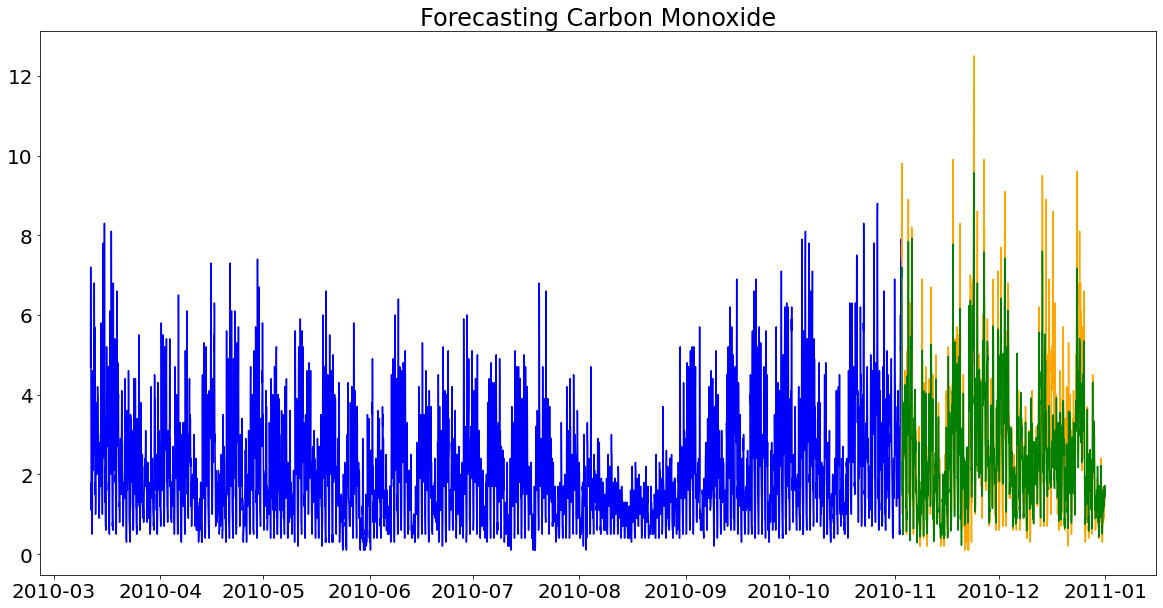

In [58]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Carbon Monoxide', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

## Benzene model

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']),
                                                    df['target_benzene'],
                                                    test_size = 0.2, shuffle=False)

In [70]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train.head()

const  deg_C  relative_humidity  absolute_humidity  \
date_time                                                                 
2010-03-10 18:00:00    1.0   13.1               46.0             0.7578   
2010-03-10 19:00:00    1.0   13.2               45.3             0.7255   
2010-03-10 20:00:00    1.0   12.6               56.2             0.7502   
2010-03-10 21:00:00    1.0   11.0               62.4             0.7867   
2010-03-10 22:00:00    1.0   11.9               59.0             0.7888   

                     sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
date_time                                                               
2010-03-10 18:00:00    1387.2    1087.8    1056.0    1742.8    1293.4   
2010-03-10 19:00:00    1279.1     888.2    1197.5    1449.9    1010.9   
2010-03-10 20:00:00    1331.9     929.6    1060.2    1586.1    1117.0   
2010-03-10 21:00:00    1321.0     929.0    1102.9    1536.5    1263.2   
2010-03-10 22:00:00    1272.0     852.7    1180.9    1415.5    1132.2   

                     target_CO_lag_1  target_CO_lag_2  target_CO_lag_3  \
date_time                                                                
2010-03-10 18:00:00              NaN              NaN              NaN   
2010-03-10 19:00:00              2.5              NaN              NaN   
2010-03-10 20:00:00              2.1              2.5              NaN   
2010-03-10 21:00:00              2.2              2.1              2.5   
2010-03-10 22:00:00              2.2              2.2              2.1   

                     lag_CO_6  lag_CO_12  lag_CO_24  time  
date_time                                                  
2010-03-10 18:00:00       NaN        NaN        NaN     0  
2010-03-10 19:00:00       NaN        NaN        NaN     1  
2010-03-10 20:00:00       NaN        NaN        NaN     2  
2010-03-10 21:00:00       NaN        NaN        NaN     3  
2010-03-10 22:00:00       NaN        NaN        NaN     4

In [71]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

In [72]:
lm = sm.OLS(y_train, X_train)

In [73]:
lm_results = lm.fit()

In [74]:
lm_preds = lm_results.predict(X_test)

In [75]:
r2_score(y_test, lm_preds)

0.9297984256948523

In [76]:
mean_squared_error(y_test, lm_preds) ** 0.5

2.3589671619283226

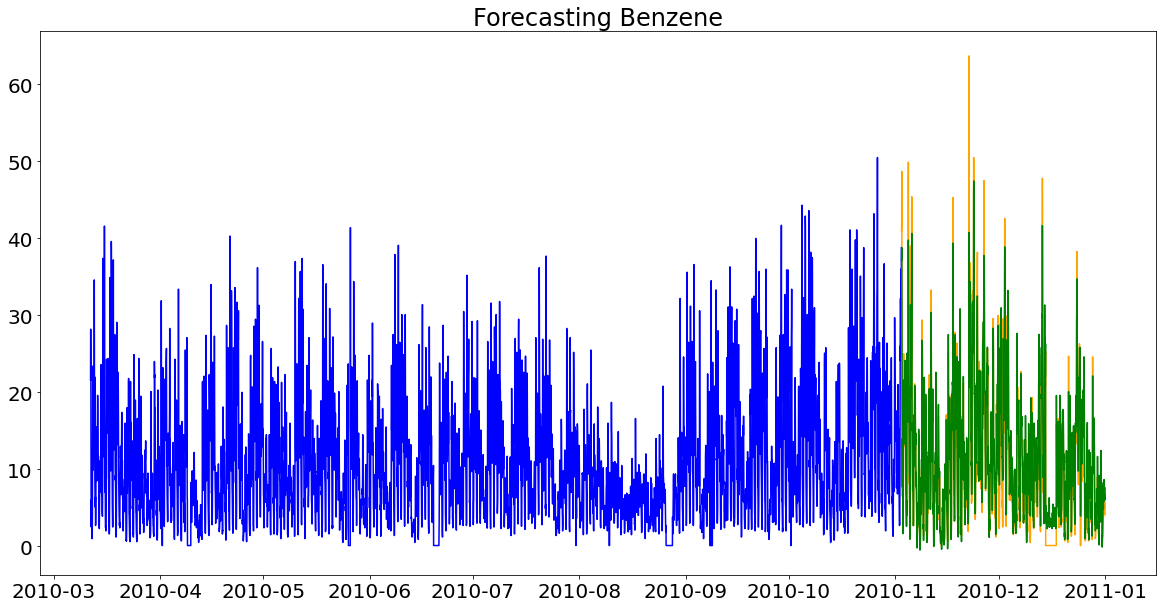

In [77]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Benzene', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);